# Crossmatch with old catalogs

In [236]:
# Importing needed libraries

from astropy.io import fits
import numpy as np

# Importing the datasets

with fits.open('gll_psc_v16.fit') as DR2:
    data_3FGL = DR2[1].data

with fits.open('gll_psc_v27.fit') as DR2:
    data_4FGL = DR2[1].data

Name_3FGL = data_3FGL['Source_Name']
Class1_3FGL = data_3FGL['CLASS1']

Name_4FGL = data_4FGL['Source_Name']
Class1_4FGL = data_4FGL['CLASS1']
Flux_Band = data_4FGL['Flux_Band']
Name_4FGL_3FGL = data_4FGL['ASSOC_FGL']

### Finding BCU that have now been classified

In [286]:
Flux_Band_BLL_train = []
Flux_Band_FSRQ_train = []
Flux_Band_Matrix_train = []

Flux_Band_BLL_test = []
Flux_Band_FSRQ_test = []
Flux_Band_Matrix_test = []

Class_BLL_train = []
Class_FSRQ_train = []
Class_Vector_train = []

Class_BLL_test = []
Class_FSRQ_test = []
Class_Vector_test = []

for i, class1 in enumerate(Class1_3FGL):
    for j, name in enumerate(Name_4FGL_3FGL):
        if class1.upper() == 'BLL':
            if Name_3FGL[i] == name and Class1_4FGL[j].upper() == 'BLL':
                Flux_Band_BLL_train.append(Flux_Band[j])
                Flux_Band_Matrix_train.append(Flux_Band[j])

                Class_BLL_train.append(1)
                Class_Vector_train.append(1)

        elif class1.upper() == 'FSRQ':
            if Name_3FGL[i] == name and Class1_4FGL[j].upper() == 'FSRQ':
                Flux_Band_FSRQ_train.append(Flux_Band[j])
                Flux_Band_Matrix_train.append(Flux_Band[j])

                Class_FSRQ_train.append(0)
                Class_Vector_train.append(0)

        else:
            if Name_3FGL[i] == name and Class1_4FGL[j].upper() == 'BLL':
                Flux_Band_BLL_test.append(Flux_Band[j])
                Flux_Band_Matrix_test.append(Flux_Band[j])

                Class_BLL_test.append(1)
                Class_Vector_test.append(1)

            elif Name_3FGL[i] == name and Class1_4FGL[j].upper() == 'FSRQ':
                Flux_Band_FSRQ_test.append(Flux_Band[j])
                Flux_Band_Matrix_test.append(Flux_Band[j])

                Class_FSRQ_test.append(0)
                Class_Vector_test.append(0)


for i, name in enumerate(Name_4FGL_3FGL):
    if name in Name_3FGL:
        continue
    
    else:
        if Class1_4FGL[i].upper() == 'BLL':
                Flux_Band_BLL_test.append(Flux_Band[i])
                Flux_Band_Matrix_test.append(Flux_Band[i])

                Class_BLL_test.append(1)
                Class_Vector_test.append(1)

        elif Class1_4FGL[i].upper() == 'FSRQ':
                Flux_Band_FSRQ_test.append(Flux_Band[i])
                Flux_Band_Matrix_test.append(Flux_Band[i])

                Class_FSRQ_test.append(0)
                Class_Vector_test.append(0)
        

In [287]:
Flux_Band_BLL_train = np.array(Flux_Band_BLL_train)
Flux_Band_FSRQ_train = np.array(Flux_Band_FSRQ_train)
Flux_Band_Matrix_train = np.array(Flux_Band_Matrix_train)

Class_BLL_train = np.array(Class_BLL_train)
Class_FSRQ_train = np.array(Class_FSRQ_train)
Class_Vector_train = np.array(Class_Vector_train)

Flux_Band_BLL_test = np.array(Flux_Band_BLL_test)
Flux_Band_FSRQ_test = np.array(Flux_Band_FSRQ_test)
Flux_Band_Matrix_test = np.array(Flux_Band_Matrix_test)

Class_BLL_test = np.array(Class_BLL_test)
Class_FSRQ_test = np.array(Class_FSRQ_test)
Class_Vector_test = np.array(Class_Vector_test)


print(np.shape(Flux_Band_BLL_train))
print(np.shape(Flux_Band_FSRQ_train))
print(np.shape(Flux_Band_Matrix_train))


print(np.shape(Flux_Band_BLL_test))
print(np.shape(Flux_Band_FSRQ_test))
print(np.shape(Flux_Band_Matrix_test))

(653, 7)
(458, 7)
(1111, 7)
(647, 7)
(283, 7)
(930, 7)


### Finding BCU that have now been classified with my method

In [64]:
Flux_Band_BLL_train = []
Flux_Band_FSRQ_train = []
Flux_Band_Matrix_train = []

Flux_Band_BLL_test = []
Flux_Band_FSRQ_test = []
Flux_Band_Matrix_test = []

Class_BLL_train = []
Class_FSRQ_train = []
Class_Vector_train = []

Class_BLL_test = []
Class_FSRQ_test = []
Class_Vector_test = []

for i, class1 in enumerate(Class1_3FGL):
    for j, name in enumerate(Name_4FGL_3FGL):
        if class1.upper() == 'BLL':
            if Name_3FGL[i] == name and Class1_4FGL[j].upper() == 'BLL':
                Flux_Band_BLL_train.append(Flux_Band[j])
                Flux_Band_Matrix_train.append(Flux_Band[j])

                Class_BLL_train.append(1)
                Class_Vector_train.append(1)

        elif class1.upper() == 'FSRQ':
            if Name_3FGL[i] == name and Class1_4FGL[j].upper() == 'FSRQ':
                Flux_Band_FSRQ_train.append(Flux_Band[j])
                Flux_Band_Matrix_train.append(Flux_Band[j])

                Class_FSRQ_train.append(0)
                Class_Vector_train.append(0)

        else:
            if Name_3FGL[i] == name and Class1_4FGL[j].upper() == 'BLL':
                Flux_Band_BLL_test.append(Flux_Band[j])
                Flux_Band_Matrix_test.append(Flux_Band[j])

                Class_BLL_test.append(1)
                Class_Vector_test.append(1)

            elif Name_3FGL[i] == name and Class1_4FGL[j].upper() == 'FSRQ':
                Flux_Band_FSRQ_test.append(Flux_Band[j])
                Flux_Band_Matrix_test.append(Flux_Band[j])

                Class_FSRQ_test.append(0)
                Class_Vector_test.append(0)


for i, name in enumerate(Name_4FGL_3FGL):
    if name == '':
        if Class1_4FGL[i].upper() == 'BLL':
                Flux_Band_BLL_test.append(Flux_Band[i])
                Flux_Band_Matrix_test.append(Flux_Band[i])

                Class_BLL_test.append(1)
                Class_Vector_test.append(1)

        elif Class1_4FGL[i].upper() == 'FSRQ':
                Flux_Band_FSRQ_test.append(Flux_Band[i])
                Flux_Band_Matrix_test.append(Flux_Band[i])

                Class_FSRQ_test.append(0)
                Class_Vector_test.append(0)

In [65]:
Flux_Band_BLL_train = np.array(Flux_Band_BLL_train)
Flux_Band_FSRQ_train = np.array(Flux_Band_FSRQ_train)
Flux_Band_Matrix_train = np.array(Flux_Band_Matrix_train)

Class_BLL_train = np.array(Class_BLL_train)
Class_FSRQ_train = np.array(Class_FSRQ_train)
Class_Vector_train = np.array(Class_Vector_train)

Flux_Band_BLL_test = np.array(Flux_Band_BLL_test)
Flux_Band_FSRQ_test = np.array(Flux_Band_FSRQ_test)
Flux_Band_Matrix_test = np.array(Flux_Band_Matrix_test)

Class_BLL_test = np.array(Class_BLL_test)
Class_FSRQ_test = np.array(Class_FSRQ_test)
Class_Vector_test = np.array(Class_Vector_test)


print(np.shape(Flux_Band_BLL_train))
print(np.shape(Flux_Band_FSRQ_train))
print(np.shape(Flux_Band_Matrix_train))


print(np.shape(Flux_Band_BLL_test))
print(np.shape(Flux_Band_FSRQ_test))
print(np.shape(Flux_Band_Matrix_test))

(653, 7)
(458, 7)
(1111, 7)
(629, 7)
(268, 7)
(897, 7)


## Calculating the accuracy of the cross-match

In [288]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.preprocessing import StandardScaler
from numpy import log10

kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * WhiteKernel()

gpc = GaussianProcessClassifier(kernel=kernel)

X_train, y_train, X_test, y_test = Flux_Band_Matrix_train, Class_Vector_train, Flux_Band_Matrix_test, Class_Vector_test

for index, values in enumerate(X_train):
    if 0 in values:
        X_train = np.delete(X_train, index, 0)
        y_train = np.delete(y_train, index, 0)
        print(index)

for index, values in enumerate(X_test):
    if 0 in values:
        X_test = np.delete(X_test, index, 0)
        y_test = np.delete(y_test, index, 0)
        print(index)

X_test = StandardScaler().fit_transform(log10(X_test))
X_train = StandardScaler().fit_transform(log10(X_train))

gpc.fit(X_train, y_train)

gpc.kernel_

769


8.54**2 * RBF(length_scale=3.59) + 0.024**2 * WhiteKernel(noise_level=0.000574)

In [289]:
from sklearn.metrics import accuracy_score

y_pred = gpc.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8460710441334769


0.8460710441334769
[[238  45]
 [ 98 548]]
TP 548
TN 238
FP 45
FN 98


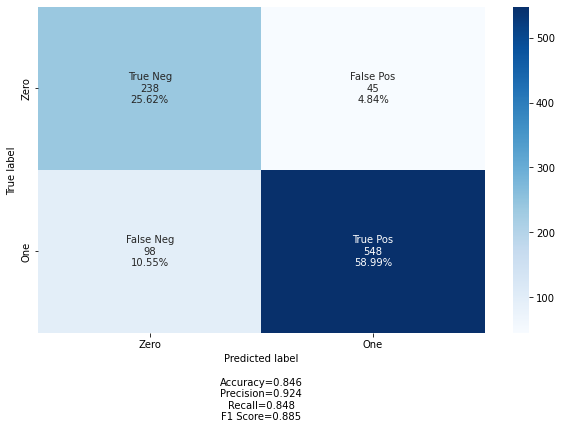

In [290]:
# Confusion matrix

from sklearn import metrics
from cf_matrix import make_confusion_matrix

confusion = metrics.confusion_matrix(y_test, y_pred)

print(metrics.accuracy_score(y_test, y_pred))
print(confusion)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(confusion, group_names=labels, categories=categories, cmap='Blues', figsize=(10,6))

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('TP', TP)
print('TN', TN)
print('FP', FP)
print('FN', FN)

Text(0, 0.5, 'Frequency')

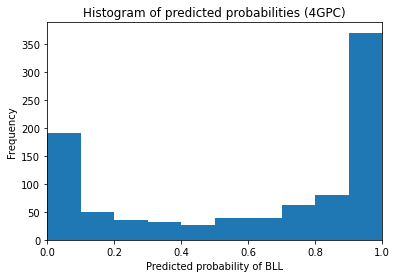

In [291]:
# Adjusting classification threshold
import matplotlib.pyplot as plt

# store the predicted probabilities for class 1
y_pred_prob = gpc.predict_proba(X_test)[:, 1]

# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=10)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities (4GPC)')
plt.xlabel('Predicted probability of BLL')
plt.ylabel('Frequency')

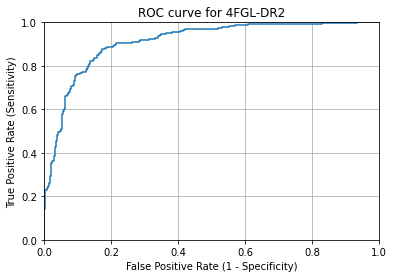

In [292]:
# ROC Curve

# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for 4FGL-DR2')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [293]:
# Area Under The Curve

# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.9110536161647103


# Adjusting the classification threshold to maximize either number of classified sources or classification accuracy

In [297]:
# hellooooo

thresholds = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

threshold = 0.6


# X_test = StandardScaler().fit_transform(log10(Flux_Band_Matrix_test))
# y_pred_prob = gpc.predict_proba(X_test)[:, 1]
X_test_new = np.array([])

for i, prob in enumerate(y_pred_prob):
    if prob > 0.5 and prob < threshold:
        continue
    elif prob < 0.5 and prob > 1-threshold:
        continue
    else:
        X_test_new = np.append(X_test_new, X_test[i])

print('Threshold:', threshold)
print('--------------------------------------------------------')
y_pred_new = gpc.predict(X_test_new)
print('Accuracy:', accuracy_score(y_test, y_pred_new))
y_pred_prob_new = gpc.predict_proba(X_test_new)[:, 1]
print('Number of classified sources:', len(y_pred_prob_new))

Threshold: 0.6
--------------------------------------------------------


ValueError: Expected 2D array, got 1D array instead:
array=[-1.92307031 -1.46423137  0.12835602 ... -0.34796908 -0.06942488
 -0.93406582].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [298]:
X_test_new

array([-1.92307031, -1.46423137,  0.12835602, ..., -0.34796908,
       -0.06942488, -0.93406582])

# Gaussian Process Regression

In [209]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RationalQuadratic, Matern

kernel= 1.0 * RBF(length_scale=1.0) + 1.0 * RationalQuadratic() + 1.0 * WhiteKernel() + 1.0 * Matern(length_scale=1.0)

gpc = GaussianProcessRegressor(kernel=kernel)

X_train, y_train, X_test, y_test = Flux_Band_Matrix_train, Class_Vector_train, Flux_Band_Matrix_test, Class_Vector_test

for index, values in enumerate(X_train):
    if 0 in values:
        X_train = np.delete(X_train, index, 0)
        y_train = np.delete(y_train, index, 0)
        print(index)

for index, values in enumerate(X_test):
    if 0 in values:
        X_test = np.delete(X_test, index, 0)
        y_test = np.delete(y_test, index, 0)
        print(index)

X_test = StandardScaler().fit_transform(log10(X_test))
X_train = StandardScaler().fit_transform(log10(X_train))

gpc.fit(X_train, y_train)

gpc.kernel_

769


0.51**2 * RBF(length_scale=9.56) + 0.697**2 * RationalQuadratic(alpha=0.0911, length_scale=2.9) + 0.438**2 * WhiteKernel(noise_level=0.192) + 0.176**2 * Matern(length_scale=0.208, nu=1.5)

In [210]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from numpy import sqrt

y_pred = gpc.predict(X_test)

print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 0.2360489676511172
Mean Squared Error (MSE): 0.11871779536036436
Root Mean Squared Error (RMSE): 0.34455448823134543


Text(0, 0.5, 'Frequency')

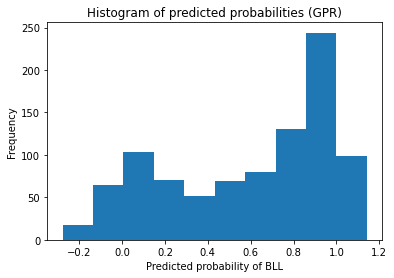

In [211]:
# Adjusting classification threshold
import matplotlib.pyplot as plt

# store the predicted probabilities for class 1
y_pred_prob = gpc.predict(X_test)

# histogram of predicted probabilities
plt.hist(y_pred_prob, )#bins=10)
# plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities (GPR)')
plt.xlabel('Predicted probability of BLL')
plt.ylabel('Frequency')

## Calculating the classification accuracy

In [212]:
TP = 0
TN = 0
FP = 0
FN = 0

# Calculating class 0 and class 1 entries with threshold of 0.5

y_pred = np.zeros(len(y_pred_prob), dtype=int)

for i, prob in enumerate(y_pred_prob):
    if prob < 0.5:
        y_pred[i] = 0
    else: 
        y_pred[i] = 1

# calculate accuracy score with metrics

for i, result in enumerate(y_pred):
    if result == 1 and y_test[i] == 1:
        TP += 1
    elif result == 1 and y_test[i] == 0:
        FP += 1
    elif result == 0 and y_test[i] == 1:
        FN += 1
    elif result == 0 and y_test[i] == 0:
        TN += 1


In [213]:
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# Classification accuracy: Overall, how often is the classifier correct?
print('Classification accuracy')
print((TP + TN) / (TP + TN + FP + FN))

# Classification error / Misclassification Rate: Overall, how often is the classifier incorrect?
print('Classification error / Misclassification Rate')
print((FP + FN) / (TP + TN + FP + FN))

# Sensitivity / True Positive Rate / Recall: When the actual value is positive, how often is the prediction correct?
print('Sensitivity / True Positive Rate / Recall')
print(TP / (TP + FN))

# Specificity: When the actual value is negative, how often is the prediction correct?
print('Specificity')
print(TN / (TN + FP))

# False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print('False Positive Rate')
print(FP / (TN + FP))

# Precision: When a positive value is predicted, how often is the prediction correct?
print('Precision')
print(TP / (TP + FP))

True Positives: 542
True Negatives: 241
False Positives: 42
False Negatives: 104
Classification accuracy
0.8428417653390743
Classification error / Misclassification Rate
0.15715823466092574
Sensitivity / True Positive Rate / Recall
0.8390092879256966
Specificity
0.8515901060070671
False Positive Rate
0.14840989399293286
Precision
0.928082191780822


# Confusion matrix time 

0.8428417653390743
[[241  42]
 [104 542]]
TP 542
TN 241
FP 42
FN 104


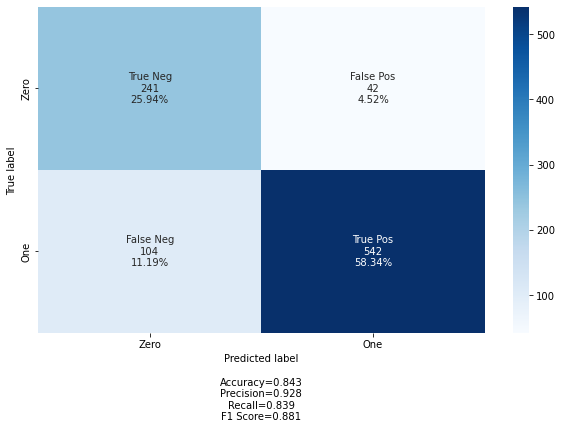

In [223]:
confusion = metrics.confusion_matrix(y_test, y_pred)

print(metrics.accuracy_score(y_test, y_pred))
print(confusion)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(confusion, group_names=labels, categories=categories, cmap='Blues', figsize=(10,6))

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('TP', TP)
print('TN', TN)
print('FP', FP)
print('FN', FN)

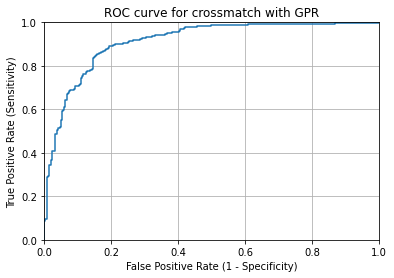

In [215]:
# ROC Curve

# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for crossmatch with GPR')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [217]:
# Area Under The Curve

# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.912721942040718


## What about the std of the predicted probabilities? 

In [221]:
# well well well 

y_pred_prob, y_pred_prob_std = gpc.predict(X_test, return_std=True)
print(y_pred_prob_std)

[0.34435519 0.28326243 0.27971649 0.26953744 0.31643988 0.3157972
 0.2871122  0.25880477 0.29706774 0.27877738 0.28027045 0.27562235
 0.28436402 0.27450138 0.28269072 0.29522546 0.27922625 0.3035275
 0.24695408 0.28266996 0.2904654  0.25949084 0.25380654 0.27522735
 0.29035224 0.27874322 0.28615272 0.27768048 0.28565781 0.30681908
 0.2789674  0.27282983 0.28660962 0.2749735  0.30125629 0.31821913
 0.25616783 0.32086448 0.38054397 0.2558839  0.27500211 0.26885121
 0.26475648 0.26228318 0.29154733 0.27119134 0.31380401 0.25831655
 0.27575413 0.30365656 0.26407253 0.27550321 0.28252356 0.29688428
 0.29264465 0.25751985 0.25961988 0.27532454 0.25813616 0.36842475
 0.26719702 0.31294315 0.27084099 0.28633203 0.31675009 0.31475198
 0.34868051 0.26943527 0.2657912  0.27976677 0.27808316 0.28200245
 0.27462271 0.26450114 0.28374888 0.27028046 0.31120102 0.27087452
 0.33107298 0.30915064 0.28357572 0.28900146 0.29303188 0.2735372
 0.28740398 0.26463942 0.32905133 0.27092213 0.27371673 0.2763977